In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import math

from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import matplotlib as mpl
from scipy.interpolate import interp1d

Welcome to JupyROOT 6.16/00


In [2]:
data_pde_rgb = np.loadtxt('/home/andrii/work/terzina/PDE_in_RGB_SiPMs_ASD-RGB.dat', dtype=float, comments='#', delimiter = '    ')


In [3]:
data_pde_nuv = np.loadtxt('/home/andrii/work/terzina/PDE_NUVHD_3.90V_Pxt_15.dat', dtype=float, comments='#', delimiter = '	')


In [4]:
f_rgb = interp1d(data_pde_rgb[:,0], data_pde_rgb[:,1]/(np.max(data_pde_rgb[:,1])), kind='cubic')
f_nuv = interp1d(data_pde_nuv[:,0], data_pde_nuv[:,1]/(np.max(data_pde_nuv[:,1])), kind='cubic')

Text(0, 0.5, 'PDE')

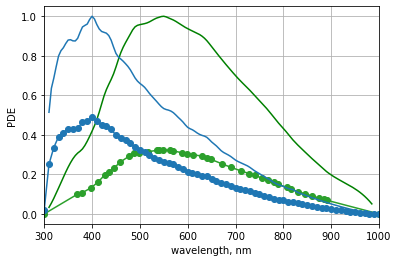

In [39]:
x = np.arange(310, 990, 5)

plt.plot(data_pde_rgb[:,0], data_pde_rgb[:,1], 'tab:green', marker = 'o')
plt.plot(x, f_rgb(x), 'g-')

plt.plot(data_pde_nuv[:,0], data_pde_nuv[:,1], 'tab:blue', marker = 'o')
plt.plot(x, f_nuv(x), 'tab:blue')

plt.xlim(300, 1000)
plt.grid()
plt.xlabel("wavelength, nm")
plt.ylabel("PDE")

Text(0, 0.5, '$PDE_{NUV}/PDE_{RGB}$')

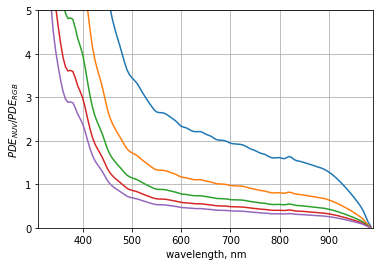

In [23]:
plt.plot(x, f_nuv(x)/(0.2*f_rgb(x)))
plt.plot(x, f_nuv(x)/(0.4*f_rgb(x)))
plt.plot(x, f_nuv(x)/(0.6*f_rgb(x)))
plt.plot(x, f_nuv(x)/(0.8*f_rgb(x)))
plt.plot(x, f_nuv(x)/(f_rgb(x)))

plt.grid()
plt.xlim(310, 990)
plt.ylim(0., 5)
plt.xlabel("wavelength, nm")
plt.ylabel("$PDE_{NUV}/PDE_{RGB}$")

Text(0, 0.5, '$PDE_{RGB}/PDE_{NUV}$')

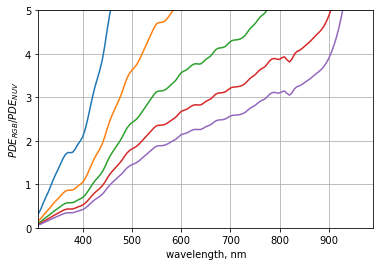

In [24]:
plt.plot(x, f_rgb(x)/(0.2*f_nuv(x)))
plt.plot(x, f_rgb(x)/(0.4*f_nuv(x)))
plt.plot(x, f_rgb(x)/(0.6*f_nuv(x)))
plt.plot(x, f_rgb(x)/(0.8*f_nuv(x)))
plt.plot(x, f_rgb(x)/(f_nuv(x)))

plt.grid()
plt.xlim(310, 990)
plt.ylim(0., 5)
plt.xlabel("wavelength, nm")
plt.ylabel("$PDE_{RGB}/PDE_{NUV}$")